In [1]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_functions as PeH

%matplotlib inline

microntocm    = 1.0e-4
cmtomicron    = 1.0e4
AAtocm        = 1.0e-8
cmtoAA        = 1.0e8
microntoAA    = 1.0e4
AAtomicron    = 1.0e-4
ergtoeV       = 6.242e11
eVtoerg       = 1.602e-12

hplanck       = 4.135667662e-15 # eV s
clight        = 2.99792458e10   # cm s-1

Loading the library to compute the charge distribution of dust grains.


ImportError: No module named PeHeat_functions

In [45]:
asize = 10.
Zhere = 0.
grain_type="silicate"
Ntot = 0.0

In [46]:
Qabs = fz.get_QabsTable(grain_type, asize)

In [47]:
Gh = PeH.get_Gamma_pe_dotdot(asize, Zhere, grain_type, Ntot, Qabs, G0=1.7)

In [48]:
print(Gh)

9.23952820825e-20


Now that I have the heating rate for a given grain at a given charge. Now I can compute the heating rate for a range of charges (take them from the charge distribution).

Once I have the array for heating rates, we sum over the grain charges times the probability distribution.



Once I have the heating rate for a given grain size, I should integrate over the grain size distribution to get the photoelectric heating at a given cell?

In [49]:
# Compute the contribution from the photoemission of valence electrons

# Panel Figure 1

photoelectric heating rate as a function of the grain charge and the incident radiation field for various sizes.

In [69]:
asize = 5.
Zhere = 0.
Ntot = 0.0

In [70]:
grain_type="silicate"
Qabs = fz.get_QabsTable(grain_type, asize)

Zmin_sil, Zmax_sil = fz.get_Zmin(asize, grain_type), fz.get_Zmax(asize, grain_type)
Znum_sil = int(Zmax_sil + abs(Zmin_sil) +1)
ZZ_sil = np.linspace(Zmin_sil, Zmax_sil, num=Znum_sil)

Gamma_dotdot_Z_sil = np.zeros_like(ZZ_sil)

for i in range(Znum_sil):
    Gamma_dotdot_Z_sil[i] = get_Gamma_pe_dotdot(asize, ZZ_sil[i], grain_type, Ntot, Qabs, G0=1.7)
    
ZZ_sil = np.concatenate(([Zmin_sil-1], ZZ_sil))
Gamma_dotdot_Z_sil = np.concatenate(([Gamma_dotdot_Z_sil[0]], Gamma_dotdot_Z_sil))

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


In [71]:
grain_type="carbonaceous"
Qabs = fz.get_QabsTable(grain_type, asize)

Zmin_carb, Zmax_carb = fz.get_Zmin(asize, grain_type), fz.get_Zmax(asize, grain_type)
Znum_carb = int(Zmax_carb + abs(Zmin_carb) +1)
ZZ_carb = np.linspace(Zmin_carb, Zmax_carb, num=Znum_carb)

Gamma_dotdot_Z_carb = np.zeros_like(ZZ_carb)

for i in range(Znum_carb):
    Gamma_dotdot_Z_carb[i] = get_Gamma_pe_dotdot(asize, ZZ_carb[i], grain_type, Ntot, Qabs, G0=1.7)
    
ZZ_carb = np.concatenate(([Zmin_carb-1], ZZ_carb))
Gamma_dotdot_Z_carb = np.concatenate(([Gamma_dotdot_Z_carb[0]], Gamma_dotdot_Z_carb))

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


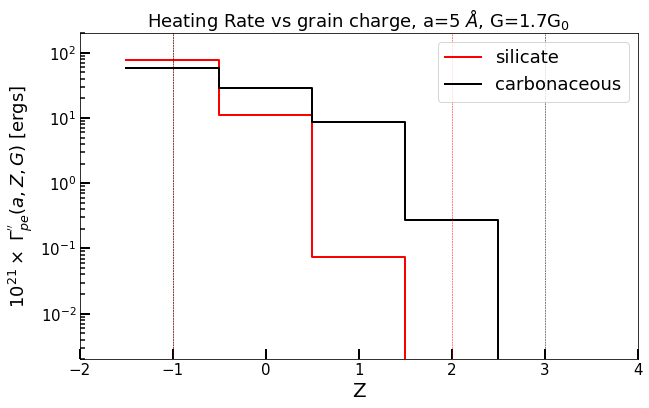

In [76]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ZZ_sil+0.5, Gamma_dotdot_Z_sil*1.0e21, "-r", linewidth=2, linestyle="steps", label="silicate")
ax.plot(ZZ_carb+0.5, Gamma_dotdot_Z_carb*1.0e21, "-k", linewidth=2, linestyle="steps", label="carbonaceous")

ax.plot([Zmin_sil, Zmin_sil], [2.0e-3, 400], "--r", linewidth=0.5)
ax.plot([Zmax_sil, Zmax_sil], [2.0e-3, 400], "--r", linewidth=0.5)

ax.plot([Zmin_carb, Zmin_carb], [2.0e-3, 400], "--k", linewidth=0.5)
ax.plot([Zmax_carb, Zmax_carb], [2.0e-3, 400], "--k", linewidth=0.5)


ax.set_yscale("log")

ax.set_xlabel("Z", fontsize=20)
ax.set_ylabel("10$^{21} \\times$ $\Gamma^{''}_{pe}(a, Z, G)$ [ergs]", fontsize=18)

ax.set_xlim(min(Zmin_sil, Zmin_carb)-1, max(Zmax_sil, Zmax_carb)+1)

ax.set_ylim(2.0e-3, 200)

#ax.text(3, 100, "100 $\\AA$", fontsize=18)

ax.legend(loc=1, fontsize=18)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("Heating Rate vs grain charge, a=%i $\AA$, G=1.7G$_{0}$"%asize, fontsize=18)

fig.show()

##### Make the new plot for a different size.

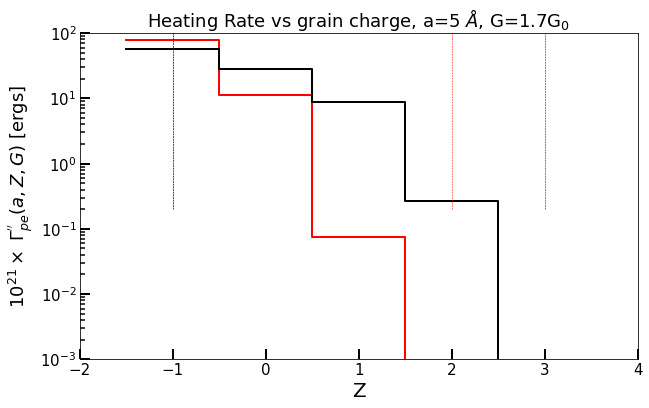

In [74]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ZZ_sil+0.5, Gamma_dotdot_Z_sil*1.0e21, "-r", linewidth=2, linestyle="steps", label="silicate")
ax.plot(ZZ_carb+0.5, Gamma_dotdot_Z_carb*1.0e21, "-k", linewidth=2, linestyle="steps", label="carbonaceous")

ax.plot([Zmin_sil, Zmin_sil], [2.0e-1, 400], "--r", linewidth=0.5)
ax.plot([Zmax_sil, Zmax_sil], [2.0e-1, 400], "--r", linewidth=0.5)

ax.plot([Zmin_carb, Zmin_carb], [2.0e-1, 400], "--k", linewidth=0.5)
ax.plot([Zmax_carb, Zmax_carb], [2.0e-1, 400], "--k", linewidth=0.5)


ax.set_yscale("log")

ax.set_xlabel("Z", fontsize=20)
ax.set_ylabel("10$^{21} \\times$ $\Gamma^{''}_{pe}(a, Z, G)$ [ergs]", fontsize=18)

ax.set_xlim(min(Zmin_sil, Zmin_carb)-1, max(Zmax_sil, Zmax_carb)+1)

ax.set_ylim(1.0e-3, 1.0e2)

#ax.text(3, 100, "100 $\\AA$", fontsize=18)

#ax.legend(loc=0, fontsize=18)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("Heating Rate vs grain charge, a=%i $\AA$, G=1.7G$_{0}$"%asize, fontsize=18)

fig.show()